In [3]:
import pandas as pd
podaci = pd.read_csv('Cellphone.csv', sep=',')
podaci.head(10)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [5]:
from sklearn.model_selection import train_test_split

X = podaci[[ 'resoloution', 'ppi' , 'cpu core', 'internal mem', 'ram' ,'RearCam', 'Front_Cam','battery']]
y = podaci['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=False)

X_train.head()

,resoloution,ppi,cpu core,internal mem,ram,RearCam,Front_Cam,battery
0,5.2,424,8,16.0,3.000,13.00,8.0,2610
1,4.0,233,2,4.0,1.000,3.15,0.0,1700
2,4.7,312,4,8.0,1.500,13.00,5.0,2000
3,4.0,233,2,4.0,0.512,3.15,0.0,1400
4,4.0,233,2,4.0,1.000,3.15,0.0,1700


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(score)
y_pred_lr = model.predict(X_test)

0.910349242601014


In [7]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=21)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(score)
y_pred_knr = model.predict(X_test)

0.5994683764971855


In [8]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(score)
y_pred_dtr = model.predict(X_test)

0.891506423753612


In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=21)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print(score)
y_pred_rfr = model.predict(X_test)

0.8778206035873085


In [10]:
y_test.values

array([2975,  754, 2880, 2858, 3287, 3287, 2054, 1734, 1734, 2054, 2001,
       2001, 2880,  705,  705, 2491, 2491, 2466, 1357, 1357, 2466, 2266,
       2266, 2445, 2445, 3116, 2409, 2409,  628,  628, 2508, 2508, 1921,
       1921, 3102, 3102, 3055,  614,  614, 3055, 4361, 4361, 2536, 3551,
       3551, 3211, 3260, 3211, 2536], dtype=int64)

<Axes: >

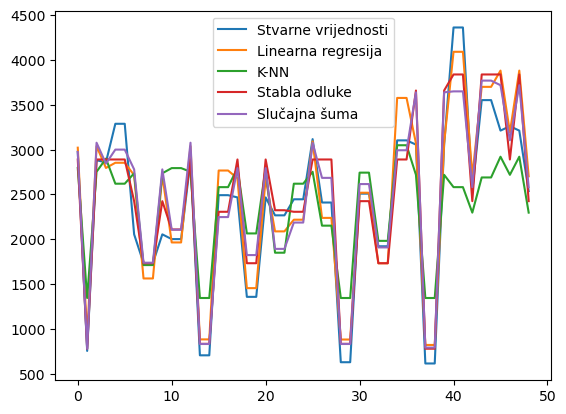

In [11]:

pd.DataFrame({
    'Stvarne vrijednosti': y_test.values,
    'Linearna regresija': y_pred_lr,
    'K-NN': y_pred_knr,
    'Stabla odluke': y_pred_dtr,
    'Slučajna šuma': y_pred_rfr,
}).plot.line()



<Axes: >

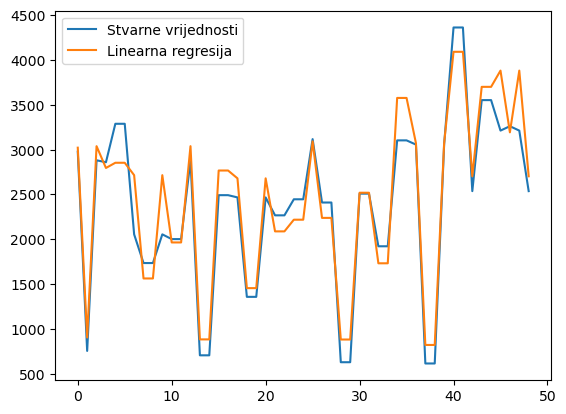

In [12]:
pd.DataFrame({
    'Stvarne vrijednosti': y_test.values,
    'Linearna regresija': y_pred_lr,
}).plot.line()

<Axes: >

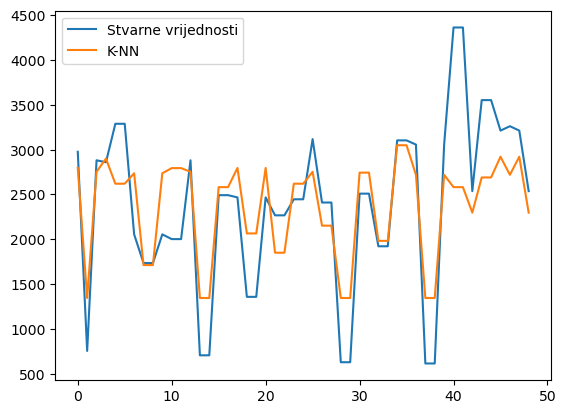

In [13]:
pd.DataFrame({
    'Stvarne vrijednosti': y_test.values,
    'K-NN': y_pred_knr,
}).plot.line()

<Axes: >

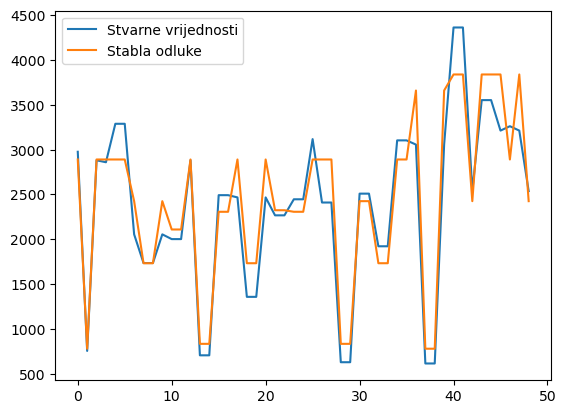

In [14]:
pd.DataFrame({
    'Stvarne vrijednosti': y_test.values,
    'Stabla odluke': y_pred_dtr,
}).plot.line()

<Axes: >

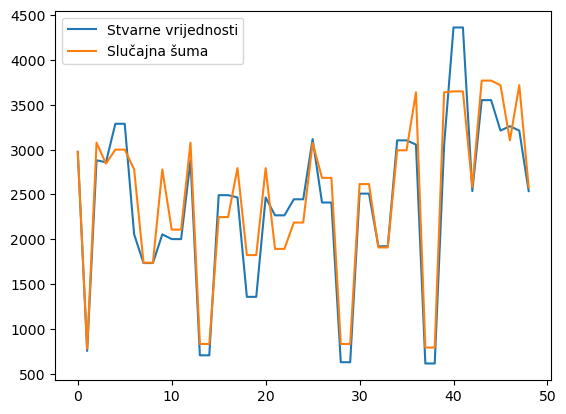

In [15]:

pd.DataFrame({
    'Stvarne vrijednosti': y_test.values,
    'Slučajna šuma': y_pred_rfr,
}).plot.line()



<Axes: >

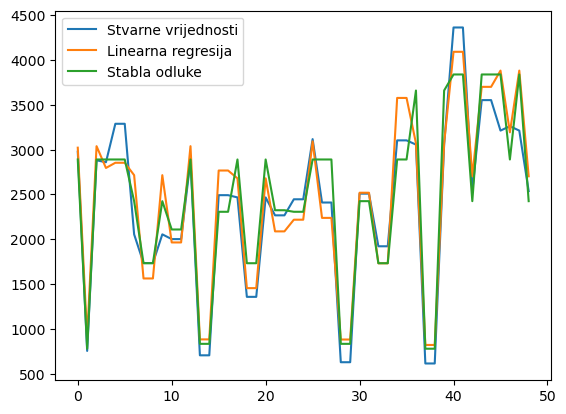

In [16]:

pd.DataFrame({
    'Stvarne vrijednosti': y_test.values,
    'Linearna regresija': y_pred_lr,
    'Stabla odluke': y_pred_dtr,
}).plot.line()



In [17]:
#Linearna regresija postiže najbolje rezultate jer je jednostavan model koji predviđa linearni odnos između varijabli i generalizira 
#testne podatke te tako može preciznije i točnije odrediti izlazne podatke.
#Stabla odluke i slučajna šuma su se također pokazali kao dobri modeli,ali zbog njihove složenosti mogu na osnovu manje bitnih
#podataka previše odstupati od stvarnih vrijednosti.Kada bi se podaci bolje organizirali ovi modeli bi pokazivali bolje rezultate.
#K-NN se pokazao kao najlošiji model zato što imamo velik skup testnih podatka koji određuju cijenu.

In [220]:
price_classes = []

for index, redak in podaci.iterrows():
    if redak.Price < 1000: 
        price_class = 'Low price'
    elif redak.Price < 2000:
        price_class = 'Medium price'
    elif redak.Price < 3000:
        price_class = 'High price'
    else:
        price_class = 'Very High Price'

    price_classes.append(price_class)

podaci['output'] = price_classes
podaci.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness,output
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4,High price
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,Medium price
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6,Medium price
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0,Medium price
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9,Medium price


In [222]:
from sklearn.model_selection import train_test_split
X = podaci[['resoloution', 'ram', 'RearCam', 'Front_Cam']]
y = podaci['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle = False)
X_train.head()

,resoloution,ram,RearCam,Front_Cam
0,5.2,3.000,13.00,8.0
1,4.0,1.000,3.15,0.0
2,4.7,1.500,13.00,5.0
3,4.0,0.512,3.15,0.0
4,4.0,1.000,3.15,0.0


In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Definiramo funkciju za crtanje konfuzijske matrice
def nacrtaj_konf_matricu(y_true, y_pred):
    # Izračunavanje matrice konfuzije
    cm = confusion_matrix(y_true, y_pred)

    # Grafički prikaz matrice konfuzije
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predviđene vrijednosti')
    plt.ylabel('Stvarne vrijednosti')
    plt.title('Konfuzijska matrica')
    plt.show()

In [226]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.673469387755102

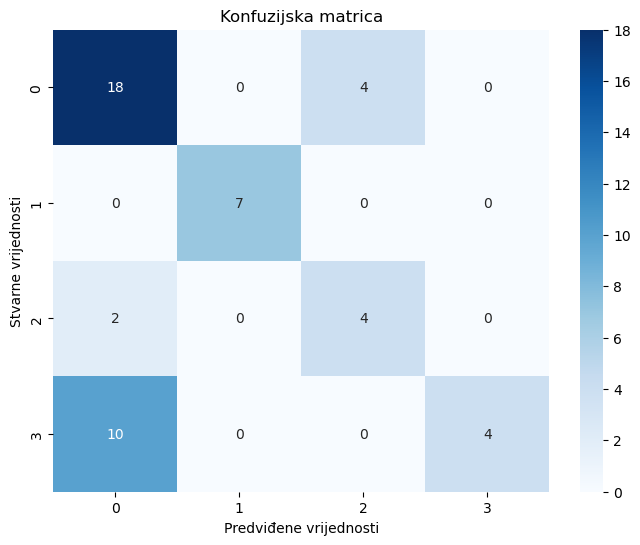

In [228]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Grafički prikaz matrice konfuzije
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()

In [277]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=6)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8163265306122449

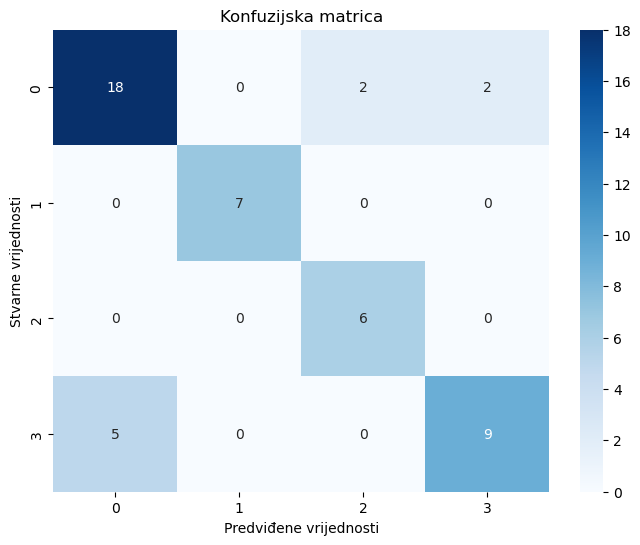

In [241]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Grafički prikaz matrice konfuzije
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()

In [284]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7755102040816326

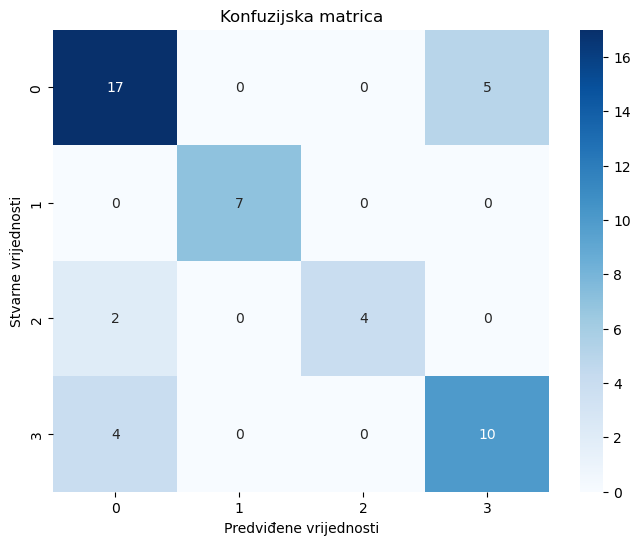

In [286]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Grafički prikaz matrice konfuzije
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()

In [ ]:
#S obzirom na rezultate modela,najbolje je se pokazao model slučajne šume jer je imao najviše točnih klasificiranih primjera 
#dok je od stvarnih vrijednosti odstupio za 9 primjera.
#Najlošije rezultate pokazao je K-NN jer je imao 16 odstupanja od stvarnih vrijednosti.